# Problem Description
- Transship Problem throughout 4 Breweries, 3 Packaging Facilities and 15 demand locations

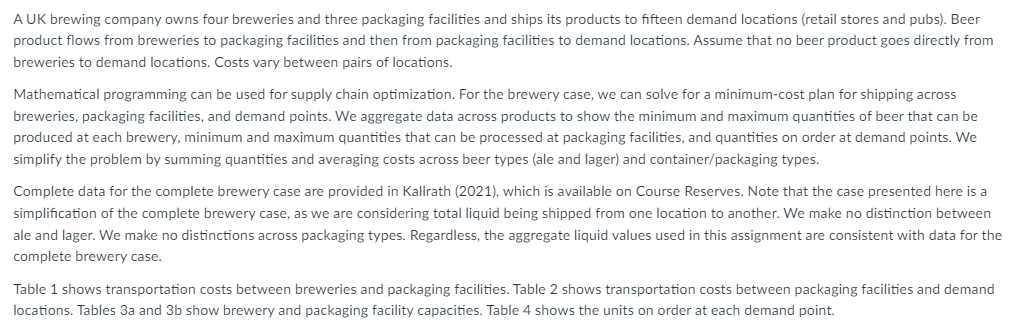

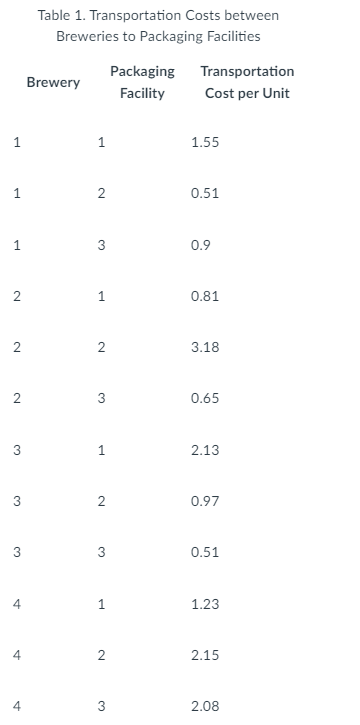

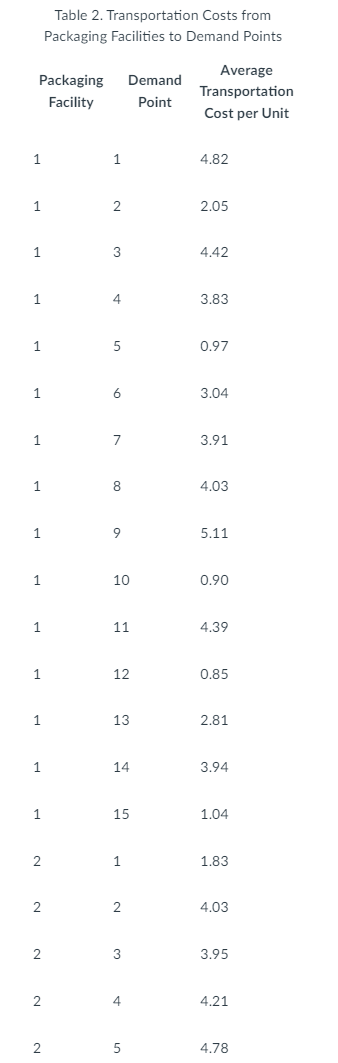

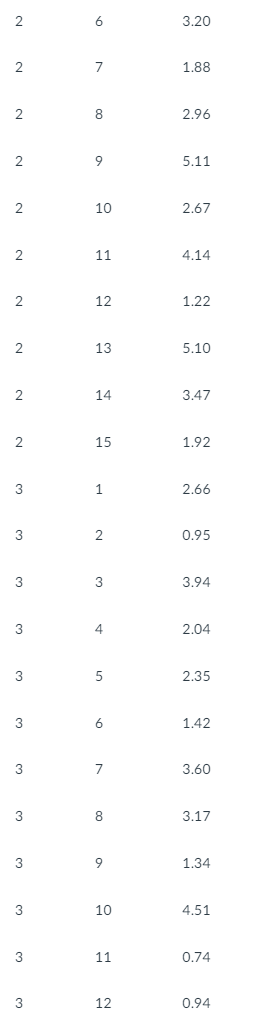

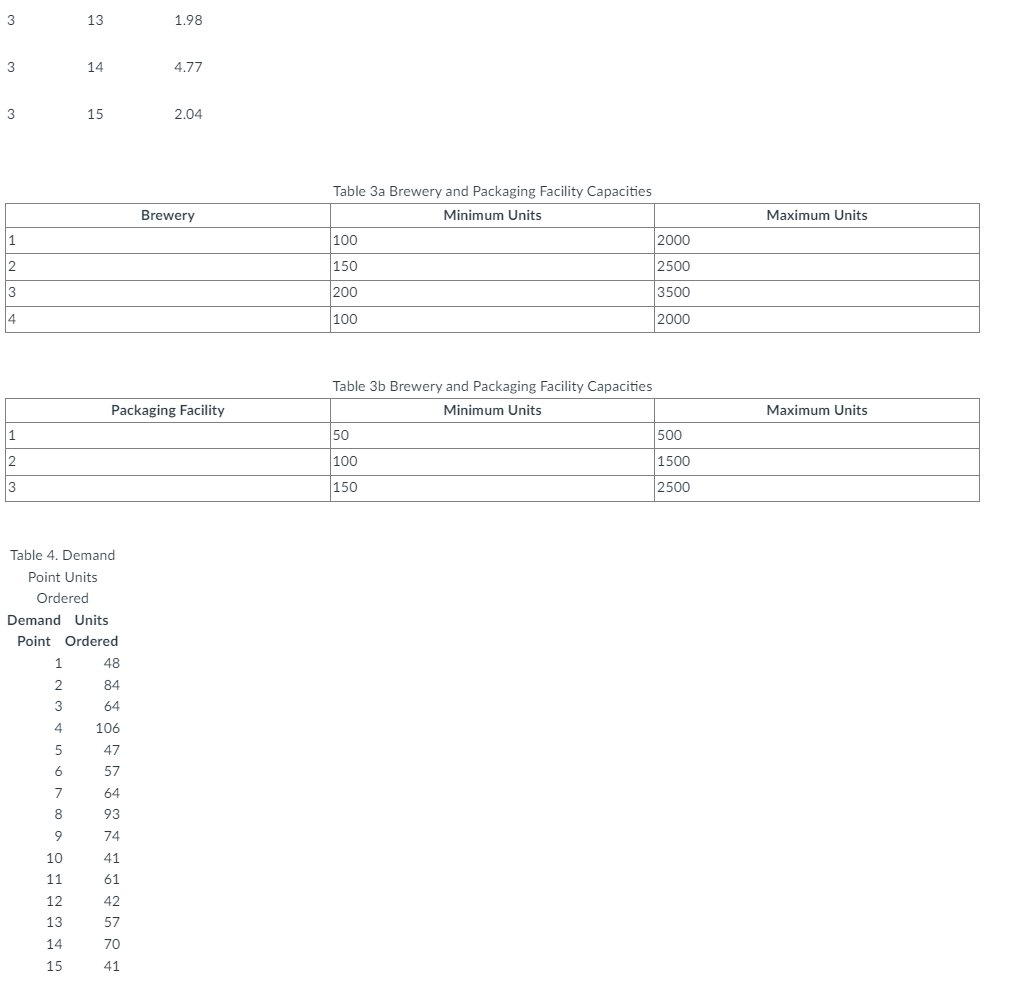

In [1]:
import pandas as pd
import numpy as np
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK, makeDict, lpSum

### Set up problem
# Create variable names B1/P1/R1...
breweries = []    # supply nodes
packaging = []    # intermediate nodes
retail = []       # demand nodes

for i in range(4):
    breweries.append("B" + str(i+1))
for i in range(3):
    packaging.append("P" + str(i+1))
for i in range(15):
    retail.append("R" + str(i+1))

# Transportation Costs    
supply_min_brew = {"B1":100, "B2":150, "B3":200, "B4":100}       # Brewery capacity minimum units
supply_max_brew = {"B1":2000, "B2":2500, "B3":3500, "B4":2000}   # Brewery capacity maximum units

supply_min_pack = {"P1":50, "P2":100, "P3":150}                  # Packaging facility minimum units
supply_max_pack = {"P1":500, "P2":1500, "P3":2500}               # Packaging facility maximum units
 
# Retail Store Demand
demand = {
    "R1":48,
    "R2":84,
    "R3":64,
    "R4":106,
    "R5":47,
    "R6":57,
    "R7":64,
    "R8":93,
    "R9":74,
    "R10":41,
    "R11":61,
    "R12":42,
    "R13":57,
    "R14":70,
    "R15":41
}


# List of costs for each transportation path

costs_brew_to_pack = [
    [1.55, 0.51, 0.9],   # Brewery 1
    [0.81, 3.18, 0.65],  # Brewery 2
    [2.13, 0.97, 0.51],  # Brewery 3
    [1.23, 2.15, 2.08]   # Brewery 4
]


costs_pack_to_retail = [
    [4.82, 2.05, 4.42, 3.83, 0.97, 3.04, 3.91, 4.03, 5.11, 0.90, 4.39, 0.85, 2.81, 3.94, 1.04 ], # Packaging facility 1
    [1.83, 4.03, 3.95, 4.21, 4.78, 3.20, 1.88, 2.96, 5.11, 2.67, 4.14, 1.22, 5.10, 3.47, 1.92 ], # Packaging facility 2
    [2.66, 0.95, 3.94, 2.04, 2.35, 1.42, 3.60, 3.17, 1.34, 4.51, 0.74, 0.94, 1.98, 4.77, 2.04 ]  # Packaging facility 3
]


# Create a dictionary transportation costs
costs_brew_to_pack = makeDict([breweries, packaging], costs_brew_to_pack, 0)   # costs from brewery to packaging facilities
costs_pack_to_retail = makeDict([packaging, retail], costs_pack_to_retail, 0)  # costs from packaging to retail stores

# Create the problem
prob = LpProblem("Brewery Transshipment Problem", LpMinimize)


### Define Decision Variables

# Create list of tuples for all possible routes from breweries to packaging facilities
Routes_b_p = [(b,p) for b in breweries for p in packaging]

# Create dictionary to contain referenced variables for the routes from breweries to packaging facilities
vars = LpVariable.dicts("Route", (breweries, packaging), 0, None)

# Create list of tuples for all posible routes from packaging facilities to retail stores
Routes_p_r = [(p,r) for p in packaging for r in retail]

# Create dictionary to contain referenced variables for the routes from packaging to retail stores
vars_2 = LpVariable.dicts("Route", (packaging, retail), 0, None)


# Add objective function to 'prob'
prob += (
    lpSum([vars[b][p] * costs_brew_to_pack[b][p] for (b,p) in Routes_b_p]) + lpSum([vars_2[p][r] * costs_pack_to_retail[p][r] for (p,r) in Routes_p_r]),
    "Sum_of_Transporting_costs",
)



C:\Users\richd\anaconda3\lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [38]:
### Constraints

# Brewery minimum and maximum capacity 
for b in breweries:
    prob += (
        lpSum([vars[b][p] for p in packaging]) >= supply_min_brew[b],
        "Sum_of_min_Products_out_of_breweries_%s" % b
    )
for b in breweries:
    prob += (
        lpSum([vars[b][p] for p in packaging]) <= supply_max_brew[b],
        "Sum_of_max_Products_out_of_breweries_%s" % b
    )

# Packaging minimum and maximum capacity
for p in packaging:
    prob += (
        lpSum([vars_2[p][r] for r in retail]) >= supply_min_pack[p],
        "Sum_of_min_Products_out_of_breweries_%s" % p
    )
for p in packaging:
    prob += (
        lpSum([vars_2[p][r] for r in retail]) <= supply_max_pack[p],
        "Sum_of_max_Products_out_of_breweries_%s" % p
    )

# Retail Store Demand
for r in retail:
    prob += (
        lpSum([vars_2[p][r] for p in packaging]) >= demand[r],
        "Sum_of_min_Products_out_of_breweries_%s" % r
    )

    
# What's shipped in must be shipped out
for p in packaging:
    prob += (
        lpSum([vars[b][p] for b in breweries]) - lpSum([vars_2[p][r] for r in retail]) == 0,
        "Sum_of_products_out_of_packaging_%s" % p
    )


In [39]:
# #Solve problem
# prob.solve()

# # print the variables optimized value
# for v in prob.variables():
#     print(v.name, "=", v.varValue)
    
# # optimized objective function value
# print("Value of Objective Function = ", value(prob.objective))

# # Solve the Problem
# prob.writeLP("prob_assn2.lp")
# prob.solve(GLPK(options=['--ranges prob_assn2.sen']))
# print("status:", LpStatus[prob.status])

# for v in prob.variables():
#     print(v.name, "=", v.varValue)

# print("Objective", value(prob.objective))
# print("")


# Solve the Problem
prob.solve()
prob.writeLP("prob_assn2.lp")
prob.solve(GLPK(options=['--ranges prob_assn2.sen']))
print("status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Objective", value(prob.objective))
print("")

status: Optimal
Route_B1_P1 = 0.0
Route_B1_P2 = 275.0
Route_B1_P3 = 0.0
Route_B2_P1 = 29.0
Route_B2_P2 = 0.0
Route_B2_P3 = 121.0
Route_B3_P1 = 0.0
Route_B3_P2 = 0.0
Route_B3_P3 = 424.0
Route_B4_P1 = 100.0
Route_B4_P2 = 0.0
Route_B4_P3 = 0.0
Route_P1_R1 = 0.0
Route_P1_R10 = 41.0
Route_P1_R11 = 0.0
Route_P1_R12 = 0.0
Route_P1_R13 = 0.0
Route_P1_R14 = 0.0
Route_P1_R15 = 41.0
Route_P1_R2 = 0.0
Route_P1_R3 = 0.0
Route_P1_R4 = 0.0
Route_P1_R5 = 47.0
Route_P1_R6 = 0.0
Route_P1_R7 = 0.0
Route_P1_R8 = 0.0
Route_P1_R9 = 0.0
Route_P2_R1 = 48.0
Route_P2_R10 = 0.0
Route_P2_R11 = 0.0
Route_P2_R12 = 0.0
Route_P2_R13 = 0.0
Route_P2_R14 = 70.0
Route_P2_R15 = 0.0
Route_P2_R2 = 0.0
Route_P2_R3 = 0.0
Route_P2_R4 = 0.0
Route_P2_R5 = 0.0
Route_P2_R6 = 0.0
Route_P2_R7 = 64.0
Route_P2_R8 = 93.0
Route_P2_R9 = 0.0
Route_P3_R1 = 0.0
Route_P3_R10 = 0.0
Route_P3_R11 = 61.0
Route_P3_R12 = 42.0
Route_P3_R13 = 57.0
Route_P3_R14 = 0.0
Route_P3_R15 = 0.0
Route_P3_R2 = 84.0
Route_P3_R3 = 64.0
Route_P3_R4 = 106.0
Route_P

In [42]:
### This section is where I answered problems 2-4. I made adjustments to test removing breweries and package facilities, as well as demand multiples

### Set up problem
# Create variable names B1/P1/R1...
breweries = []    # supply nodes
packaging = []    # intermediate nodes
retail = []       # demand nodes

for i in range(3):
    breweries.append("B" + str(i+1))
for i in range(3):
    packaging.append("P" + str(i+1))
for i in range(15):
    retail.append("R" + str(i+1))

# Transportation Costs    

# supply_min_brew = {"B1":100, "B2":150, "B3":200, "B4":100}       # Brewery capacity minimum units
# supply_max_brew = {"B1":2000, "B2":2500, "B3":3500, "B4":2000}   # Brewery capacity maximum units

supply_min_brew = {"B1":100, "B2":150, "B3":200}       # Brewery capacity minimum units
supply_max_brew = {"B1":2000, "B2":2500, "B3":3500}   # Brewery capacity maximum units

# supply_min_pack = {"P1":50, "P2":100}                  # Packaging facility minimum units
# supply_max_pack = {"P1":500, "P2":1500}               # Packaging facility maximum units

supply_min_pack = {"P1":50, "P2":100, "P3":150}                  # Packaging facility minimum units
supply_max_pack = {"P1":500, "P2":1500, "P3":2500}               # Packaging facility maximum units
 
# Retail Store Demand
demand = {
    "R1":48,
    "R2":84,
    "R3":64,
    "R4":106,
    "R5":47,
    "R6":57,
    "R7":64,
    "R8":93,
    "R9":74,
    "R10":41,
    "R11":61,
    "R12":42,
    "R13":57,
    "R14":70,
    "R15":41
}

demand_multiple = demand
for key in demand_multiple:
    demand_multiple[key] *= 4.7

# List of costs for each transportation path

costs_brew_to_pack = [
    [1.55, 0.51, 0.9],   # Brewery 1
    [0.81, 3.18, 0.65],  # Brewery 2
    [2.13, 0.97, 0.51]# ,  # Brewery 3
#    [1.23, 2.15, 2.08]   # Brewery 4
]


costs_pack_to_retail = [
    [4.82, 2.05, 4.42, 3.83, 0.97, 3.04, 3.91, 4.03, 5.11, 0.90, 4.39, 0.85, 2.81, 3.94, 1.04 ], # Packaging facility 1
    [1.83, 4.03, 3.95, 4.21, 4.78, 3.20, 1.88, 2.96, 5.11, 2.67, 4.14, 1.22, 5.10, 3.47, 1.92 ], # Packaging facility 2
    [2.66, 0.95, 3.94, 2.04, 2.35, 1.42, 3.60, 3.17, 1.34, 4.51, 0.74, 0.94, 1.98, 4.77, 2.04 ]  # Packaging facility 3
]


# Create a dictionary transportation costs
costs_brew_to_pack = makeDict([breweries, packaging], costs_brew_to_pack, 0)   # costs from brewery to packaging facilities
costs_pack_to_retail = makeDict([packaging, retail], costs_pack_to_retail, 0)  # costs from packaging to retail stores

# Create the problem
prob = LpProblem("Brewery Transshipment Problem", LpMinimize)


### Define Decision Variables

# Create list of tuples for all possible routes from breweries to packaging facilities
Routes_b_p = [(b,p) for b in breweries for p in packaging]

# Create dictionary to contain referenced variables for the routes from breweries to packaging facilities
vars = LpVariable.dicts("Route", (breweries, packaging), 0, None)

# Create list of tuples for all posible routes from packaging facilities to retail stores
Routes_p_r = [(p,r) for p in packaging for r in retail]

# Create dictionary to contain referenced variables for the routes from packaging to retail stores
vars_2 = LpVariable.dicts("Route", (packaging, retail), 0, None)


# Add objective function to 'prob'
prob += (
    lpSum([vars[b][p] * costs_brew_to_pack[b][p] for (b,p) in Routes_b_p]) + lpSum([vars_2[p][r] * costs_pack_to_retail[p][r] for (p,r) in Routes_p_r]),
    "Sum_of_Transporting_costs",
)


### Constraints

# Brewery minimum and maximum capacity 
for b in breweries:
    prob += (
        lpSum([vars[b][p] for p in packaging]) >= supply_min_brew[b],
        "Sum_of_min_Products_out_of_breweries_%s" % b
    )
for b in breweries:
    prob += (
        lpSum([vars[b][p] for p in packaging]) <= supply_max_brew[b],
        "Sum_of_max_Products_out_of_breweries_%s" % b
    )

# Packaging minimum and maximum capacity
for p in packaging:
    prob += (
        lpSum([vars_2[p][r] for r in retail]) >= supply_min_pack[p],
        "Sum_of_min_Products_out_of_breweries_%s" % p
    )
for p in packaging:
    prob += (
        lpSum([vars_2[p][r] for r in retail]) <= supply_max_pack[p],
        "Sum_of_max_Products_out_of_breweries_%s" % p
    )

# Retail Store Demand
for r in retail:
    prob += (
        lpSum([vars_2[p][r] for p in packaging]) >= demand_multiple[r],
        "Sum_of_min_Products_out_of_breweries_%s" % r
    )

    
# What's shipped in must be shipped out
for p in packaging:
    prob += (
        lpSum([vars[b][p] for b in breweries]) - lpSum([vars_2[p][r] for r in retail]) == 0,
        "Sum_of_products_out_of_packaging_%s" % p
    )

#Solve problem
prob.solve()

# print the variables optimized value
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
# optimized objective function value
print("Value of Objective Function = ", value(prob.objective))



Route_B1_P1 = 0.0
Route_B1_P2 = 1460.3
Route_B1_P3 = 0.0
Route_B2_P1 = 500.0
Route_B2_P2 = 0.0
Route_B2_P3 = 0.0
Route_B3_P1 = 0.0
Route_B3_P2 = 0.0
Route_B3_P3 = 2500.0
Route_P1_R1 = 0.0
Route_P1_R10 = 192.7
Route_P1_R11 = 0.0
Route_P1_R12 = 0.0
Route_P1_R13 = 0.0
Route_P1_R14 = 0.0
Route_P1_R15 = 86.4
Route_P1_R2 = 0.0
Route_P1_R3 = 0.0
Route_P1_R4 = 0.0
Route_P1_R5 = 220.9
Route_P1_R6 = 0.0
Route_P1_R7 = 0.0
Route_P1_R8 = 0.0
Route_P1_R9 = 0.0
Route_P2_R1 = 225.6
Route_P2_R10 = 0.0
Route_P2_R11 = 0.0
Route_P2_R12 = 0.0
Route_P2_R13 = 0.0
Route_P2_R14 = 329.0
Route_P2_R15 = 106.3
Route_P2_R2 = 0.0
Route_P2_R3 = 61.5
Route_P2_R4 = 0.0
Route_P2_R5 = 0.0
Route_P2_R6 = 0.0
Route_P2_R7 = 300.8
Route_P2_R8 = 437.1
Route_P2_R9 = 0.0
Route_P3_R1 = 0.0
Route_P3_R10 = 0.0
Route_P3_R11 = 286.7
Route_P3_R12 = 197.4
Route_P3_R13 = 267.9
Route_P3_R14 = 0.0
Route_P3_R15 = 0.0
Route_P3_R2 = 394.8
Route_P3_R3 = 239.3
Route_P3_R4 = 498.2
Route_P3_R5 = 0.0
Route_P3_R6 = 267.9
Route_P3_R7 = 0.0
Route_P3